In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Preliminaries

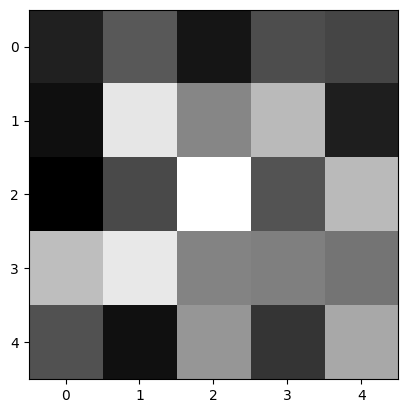

In [2]:
# Question 1

image = np.random.uniform(0., 1., (5, 5))
f, ax = plt.subplots(1, 1)
ax.imshow(image, cmap='gray');

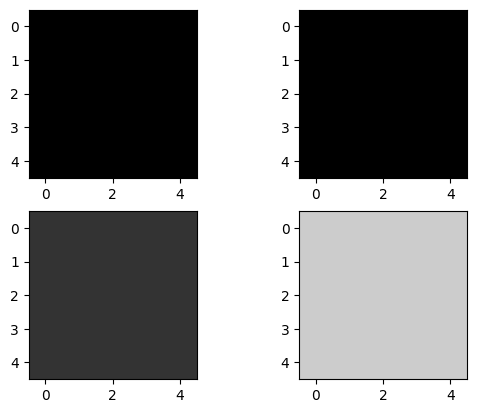

In [3]:
# Questions 2, 3 and 4

image1 = 0.2 * np.ones((5, 5))
image2 = 0.8 * np.ones((5, 5))
f, ax = plt.subplots(2, 2)
ax[0,0].imshow(image1, cmap='gray')
ax[0,1].imshow(image2, cmap='gray')
ax[1,0].imshow(image1, cmap='gray', vmin=0, vmax=1)
ax[1,1].imshow(image2, cmap='gray', vmin=0, vmax=1);

In [4]:
# Questions 5, 6, 7 and 8

def image_to_vector(img):
  p, p = img.shape
  return np.reshape(img, (p*p,))

def vector_to_image(vect):
  n = vect.shape[0]
  p = int(np.sqrt(n))
  return np.reshape(vect, (p, p))

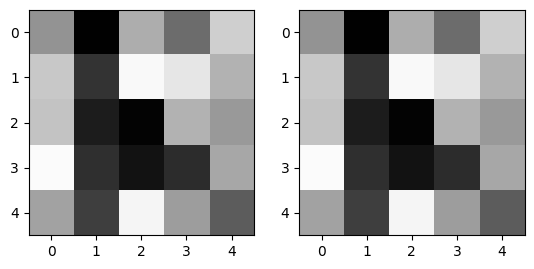

In [5]:
# Question 9

chess_image = np.random.uniform(0., 1., (5, 5))
f, ax = plt.subplots(1, 2)
ax[0].imshow(chess_image, cmap='gray', vmin=0, vmax=1)
ax[1].imshow(vector_to_image(image_to_vector(chess_image)), cmap='gray', vmin=0, vmax=1);

# 2. On chess-like images

In [6]:
# Questions 10, 11, 12 and 13

def chess_like_subspace_matrix(p):
    n = p**2
    V = np.zeros((n, 2))
    for i in range(p):
        for j in range(p):
            if i % 2 == j % 2:
                V[i * p + j, 0] = 1.
            else:
                V[i * p + j, 1] = 1.
    return V

def chess_like_image(p, alpha1, alpha2):
    V = chess_like_subspace_matrix(p)
    img = vector_to_image(V @ np.array([alpha1, alpha2]))
    return img

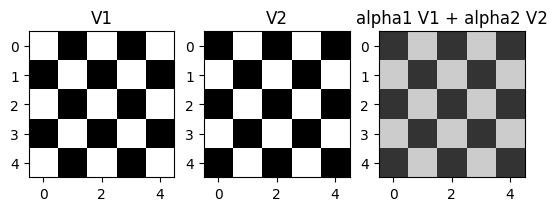

In [7]:
p = 5
V = chess_like_subspace_matrix(p)
image = chess_like_image(p, 0.2, 0.8)
f, ax = plt.subplots(1, 3)
ax[0].imshow(vector_to_image(V[:, 0]), cmap='gray', vmin=0, vmax=1)
ax[0].set_title("V1")
ax[1].imshow(vector_to_image(V[:, 1]), cmap='gray', vmin=0, vmax=1)
ax[1].set_title("V2")
ax[2].imshow(image, cmap='gray', vmin=0, vmax=1)
ax[2].set_title("alpha1 V1 + alpha2 V2");

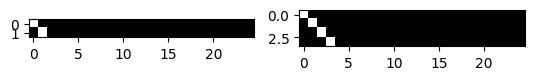

In [8]:
# Questions 14, 15 and 16

def pixel_sensing_matrix(p, m=2):
    n = p**2
    assert m <= n
    M = np.zeros((m, n))
    for i in range(m):
        M[i, i] = 1.
    return M

f, ax = plt.subplots(1, 2)
ax[0].imshow(pixel_sensing_matrix(5), cmap='gray', vmin=0, vmax=1)
ax[1].imshow(pixel_sensing_matrix(5, m=4), cmap='gray', vmin=0, vmax=1);

In [9]:
# Question 17

def decoder1(M, y):
  # return np.linalg.lstsq(M, y)[0]
  M_dagger = np.linalg.pinv(M)
  return M_dagger @ y
  

def decoder2(M, V, y):
  MV_dagger = np.linalg.pinv(M @ V)
  return V @ MV_dagger @ y

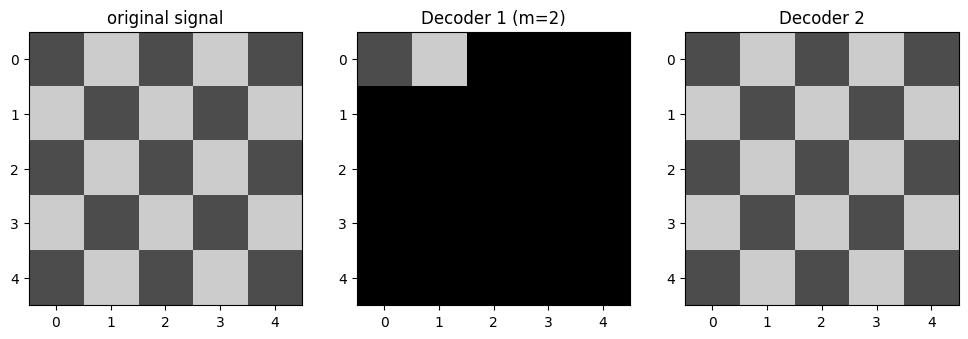

In [10]:
# Question 18

# Problem data
p = 5
signal = chess_like_image(p, 0.3, 0.8)
signal_vectorized = image_to_vector(signal)

# Subspace and sensing matrix
V = chess_like_subspace_matrix(p)
M = pixel_sensing_matrix(p)
y = M @ signal_vectorized

# Decoders
signal_hat1_vectorized = decoder1(M, y)
signal_hat2_vectorized = decoder2(M, V, y)
signal_hat1 = vector_to_image(signal_hat1_vectorized)
signal_hat2 = vector_to_image(signal_hat2_vectorized)

# Displays
f, ax = plt.subplots(1, 3, figsize=(12, 7))
ax[0].imshow(signal, cmap='gray', vmin=0, vmax=1)
ax[0].set_title("original signal")
ax[1].imshow(signal_hat1, cmap='gray', vmin=0, vmax=1)
ax[1].set_title("Decoder 1 (m=2)")
ax[2].imshow(signal_hat2, cmap='gray', vmin=0, vmax=1)
ax[2].set_title("Decoder 2");

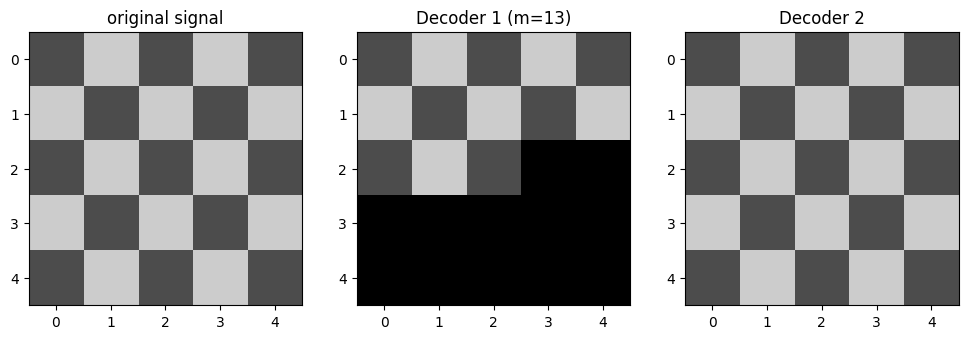

In [11]:
# Question 19

# Problem data
p = 5
signal = chess_like_image(p, 0.3, 0.8)
signal_vectorized = image_to_vector(signal)

# Subspace and sensing matrix
m = 13
V = chess_like_subspace_matrix(p)
M = pixel_sensing_matrix(p, m=m)                # More than two pixels
y = M @ signal_vectorized

# Decoders
signal_hat1_vectorized = decoder1(M, y)
signal_hat2_vectorized = decoder2(M, V, y)
signal_hat1 = vector_to_image(signal_hat1_vectorized)
signal_hat2 = vector_to_image(signal_hat2_vectorized)

# Displays
f, ax = plt.subplots(1, 3, figsize=(12, 7))
ax[0].imshow(signal, cmap='gray', vmin=0, vmax=1)
ax[0].set_title("original signal")
ax[1].imshow(signal_hat1, cmap='gray', vmin=0, vmax=1)
ax[1].set_title("Decoder 1 (m={})".format(m))
ax[2].imshow(signal_hat2, cmap='gray', vmin=0, vmax=1)
ax[2].set_title("Decoder 2");

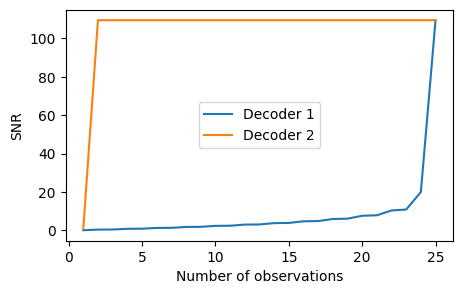

In [12]:
# Question 20

# WARNING : ADD SMALL TOLERANCE IN THE DENOMINATOR TO AVOID SNR = +INF
def snr_rec(x_true, x_hat):
  return 10 * np.log10(np.linalg.norm(x_true)**2 / (np.linalg.norm(x_true - x_hat)**2 + 1e-10))

# Problem data
p = 5
n = p**2
signal = chess_like_image(p, 0.3, 0.8)
signal_vectorized = image_to_vector(signal)

# Subspace matrix
V = chess_like_subspace_matrix(p)

snr_decoder1 = []
snr_decoder2 = []
m_values = np.arange(1, n+1)
for m in m_values:
  # Sensing matrix
  M = pixel_sensing_matrix(p, m=m)
  y = M @ signal_vectorized
  # Decoders
  signal_hat1_vectorized = decoder1(M, y)
  signal_hat2_vectorized = decoder2(M, V, y)
  snr_decoder1.append(snr_rec(signal_vectorized, signal_hat1_vectorized))
  snr_decoder2.append(snr_rec(signal_vectorized, signal_hat2_vectorized))

f, ax = plt.subplots(1, 1, figsize=(5, 3))
ax.plot(m_values, snr_decoder1, label="Decoder 1")
ax.plot(m_values, snr_decoder2, label="Decoder 2")
ax.set_ylabel("SNR")
ax.set_xlabel("Number of observations")
ax.legend();

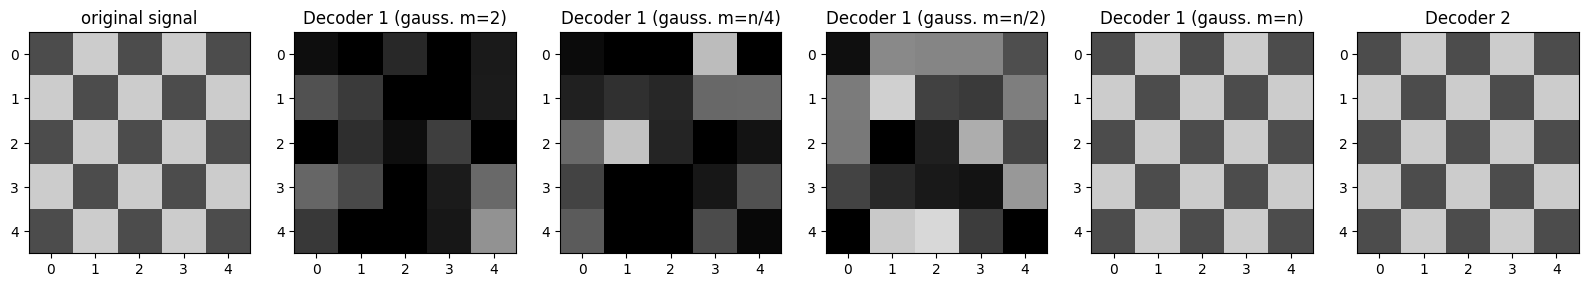

In [13]:
# Question 21

# Problem data
p = 5
n = p**2
signal = chess_like_image(p, 0.3, 0.8)
signal_vectorized = image_to_vector(signal)

# Decoder 1 (Gaussian matrix with m=2)
M = np.random.randn(2, n)
y = M @ signal_vectorized
signal_hat1_2_vectorized = decoder1(M, y)
signal_hat1_2 = vector_to_image(signal_hat1_2_vectorized)

# Decoder 1 (Gaussian matrix with m=n/4)
M = np.random.randn(int(0.25 * n), n)
y = M @ signal_vectorized
signal_hat1_10_vectorized = decoder1(M, y)
signal_hat1_10 = vector_to_image(signal_hat1_10_vectorized)

# Decoder 1 (Gaussian matrix with m=n/2)
M = np.random.randn(int(0.5 * n), n)
y = M @ signal_vectorized
signal_hat1_15_vectorized = decoder1(M, y)
signal_hat1_15 = vector_to_image(signal_hat1_15_vectorized)

# Decoder 1 (Gaussian matrix with m=3n/4)
M = np.random.randn(n, n)
y = M @ signal_vectorized
signal_hat1_20_vectorized = decoder1(M, y)
signal_hat1_20 = vector_to_image(signal_hat1_20_vectorized)

# Decoder 2
V = chess_like_subspace_matrix(p)
M = np.random.randn(2, n)
y = M @ signal_vectorized
signal_hat2_vectorized = decoder2(M, V, y)
signal_hat2 = vector_to_image(signal_hat2_vectorized)

# Displays
f, ax = plt.subplots(1, 6, figsize=(20, 7))
ax[0].imshow(signal, cmap='gray', vmin=0, vmax=1)
ax[0].set_title("original signal")
ax[1].imshow(signal_hat1_2, cmap='gray', vmin=0, vmax=1)
ax[1].set_title("Decoder 1 (gauss. m=2)")
ax[2].imshow(signal_hat1_10, cmap='gray', vmin=0, vmax=1)
ax[2].set_title("Decoder 1 (gauss. m=n/4)")
ax[3].imshow(signal_hat1_15, cmap='gray', vmin=0, vmax=1)
ax[3].set_title("Decoder 1 (gauss. m=n/2)")
ax[4].imshow(signal_hat1_20, cmap='gray', vmin=0, vmax=1)
ax[4].set_title("Decoder 1 (gauss. m=n)")
ax[5].imshow(signal_hat2, cmap='gray', vmin=0, vmax=1)
ax[5].set_title("Decoder 2");

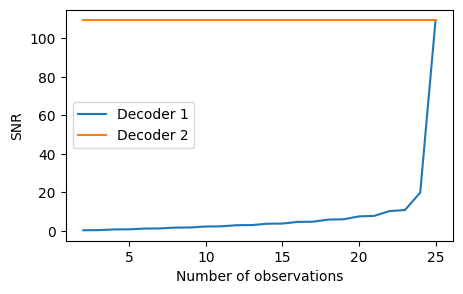

In [14]:
snr_decoder1 = []
snr_decoder2 = []
m_values = np.arange(2, n+1)
for m in m_values:
  # Sensing matrix
  M = pixel_sensing_matrix(p, m=m)
  y = M @ signal_vectorized
  # Decoders
  signal_hat1_vectorized = decoder1(M, y)
  signal_hat2_vectorized = decoder2(M, V, y)
  snr_decoder1.append(snr_rec(signal_vectorized, signal_hat1_vectorized))
  snr_decoder2.append(snr_rec(signal_vectorized, signal_hat2_vectorized))

f, ax = plt.subplots(1, 1, figsize=(5, 3))
ax.plot(m_values, snr_decoder1, label="Decoder 1")
ax.plot(m_values, snr_decoder2, label="Decoder 2")
ax.set_ylabel("SNR")
ax.set_xlabel("Number of observations")
ax.legend();

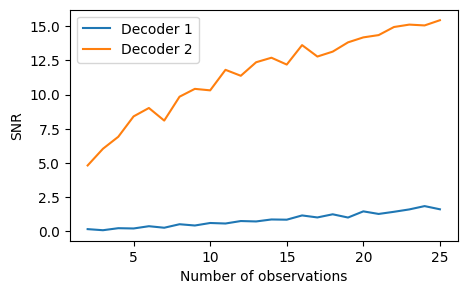

In [15]:
# Question 22

# Problem data
p = 5
n = p**2
signal = chess_like_image(p, 0.3, 0.8)
signal_vectorized = image_to_vector(signal)

# Subspace matrix
V = chess_like_subspace_matrix(p)

repeats = 100  # repeat several time the experiment to average the noise

m_values = np.arange(2, n+1)
snr_decoder1 = [[] for m in m_values]
snr_decoder2 = [[] for m in m_values]
for rep in range(repeats):
  for i, m in enumerate(m_values):
    # Sensing matrix
    M = pixel_sensing_matrix(p, m=m)
    y = M @ signal_vectorized
    # Noisy vector
    y_noise = y + np.random.normal(scale=0.5, size=(m,))
    # Decoders
    signal_hat1_vectorized = decoder1(M, y_noise)
    signal_hat2_vectorized = decoder2(M, V, y_noise)
    snr_decoder1[i].append(snr_rec(signal_vectorized, signal_hat1_vectorized))
    snr_decoder2[i].append(snr_rec(signal_vectorized, signal_hat2_vectorized))

snr_decoder1_averaged = [np.mean(vals) for vals in snr_decoder1]
snr_decoder2_averaged = [np.mean(vals) for vals in snr_decoder2]

f, ax = plt.subplots(1, 1, figsize=(5, 3))
ax.plot(m_values, snr_decoder1_averaged, label="Decoder 1")
ax.plot(m_values, snr_decoder2_averaged, label="Decoder 2")
ax.set_xlabel("Number of observations")
ax.set_ylabel("SNR")
ax.legend();

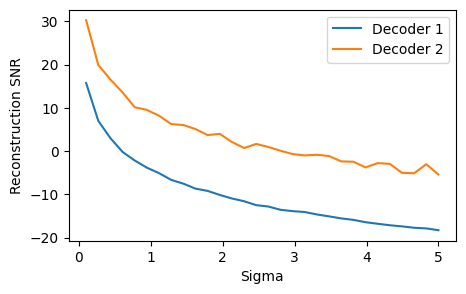

In [16]:
# Question 23

def snr(Mx, y):
  return 10 * np.log10(np.linalg.norm(Mx)**2 / np.linalg.norm(Mx - y)**2)


# Problem data
p = 5
n = p**2
signal = chess_like_image(p, 0.3, 0.8)
signal_vectorized = image_to_vector(signal)

# Subspace matrix
V = chess_like_subspace_matrix(p)

repeats = 100
sigma_values = np.linspace(0.1, 5., num=30)
snr_decoder1 = [[] for sigma in sigma_values]
snr_decoder2 = [[] for sigma in sigma_values]
for rep in range(repeats):
  for i, sigma in enumerate(sigma_values):
    # Sensing matrix
    M = pixel_sensing_matrix(p, m=m)
    y = M @ signal_vectorized
    # Noisy vector
    y_noise = y + np.random.normal(scale=sigma, size=(m,))
    # Decoders
    signal_hat1_vectorized = decoder1(M, y_noise)
    signal_hat2_vectorized = decoder2(M, V, y_noise)
    snr_decoder1[i].append(snr_rec(signal_vectorized, signal_hat1_vectorized))
    snr_decoder2[i].append(snr_rec(signal_vectorized, signal_hat2_vectorized))

snr_decoder1_averaged = [np.mean(vals) for vals in snr_decoder1]
snr_decoder2_averaged = [np.mean(vals) for vals in snr_decoder2]

f, ax = plt.subplots(1, 1, figsize=(5, 3))
ax.plot(sigma_values, snr_decoder1_averaged, label="Decoder 1")
ax.plot(sigma_values, snr_decoder2_averaged, label="Decoder 2")
ax.set_xlabel("Sigma")
ax.set_ylabel("Reconstruction SNR")
ax.legend();

# Partie 3 : images réelles

In [17]:
import matplotlib.image as mpimg

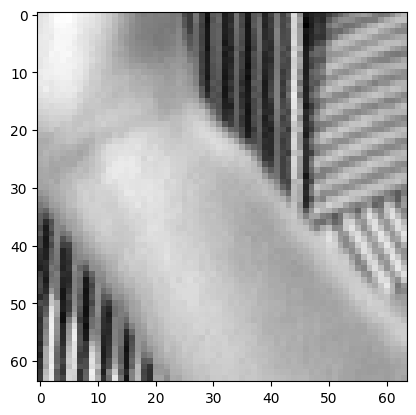

In [18]:
img = mpimg.imread("imagette.png")
plt.imshow(img, cmap='gray');

In [19]:
def get_subspace_image(c, p):
    """ return a basis of the a subspace of dimension c**2 close to
    the set of natural images
    
    Parameters
    ----------
    c: int
        square root of the the size of the subspace
    p: int
        square root of the number of pixels
        
    Returns
    -------
    V: np.ndrray
        subspace
        size [p**2, c**2]
        
    Raise
    -----
    valueError
        if c > p
    """
    import numpy as np
    from scipy.fftpack import dct, idct
    from scipy.fft import dctn, idctn

    if c > p:
        raise ValueError("Parameter c must be lower than p")
    
    V = np.zeros((n, c**2))
    counter = 0
    for i in range(c):
        for j in range(c):
            e = np.zeros((p, p))
            e[i, j] = 1
            V[:, counter] = image_to_vector(idctn(e, type=2))
        
            counter += 1
    return V

V shape : (4096, 400)
M shape : (1024, 4096)
y shape : (1024,)
SNR decoder 1: 1.2719780234661162 dB
SNR decoder 2: 16.365877345278772 dB


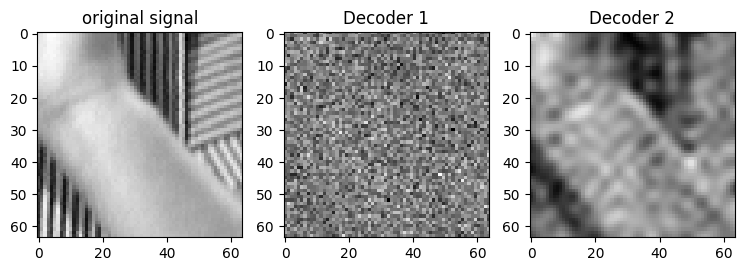

In [20]:
img_vectorized = image_to_vector(img)

p = img.shape[0]        # Image of shape (p,p)
n = p**2                # Vectorized image length
m = int(round(.25*n))   # Number of columns in the sensing matrix 
c = 20                  # Square root of the hypothetic subspace dimension

V = get_subspace_image(c, p)
M = np.random.randn(m, n)
y = M @ img_vectorized

print("V shape :", V.shape)
print("M shape :", M.shape)
print("y shape :", y.shape)

img_hat1 = decoder1(M, y)
img_hat2 = decoder2(M, V, y)

snr_hat1 = snr_rec(img_vectorized, img_hat1)
snr_hat2 = snr_rec(img_vectorized, img_hat2)

print(f"SNR decoder 1: {snr_hat1} dB")
print(f"SNR decoder 2: {snr_hat2} dB")

f, ax = plt.subplots(1, 3, figsize=(9,3))
ax[0].imshow(img, cmap='gray')
ax[0].set_title("original signal")
ax[1].imshow(vector_to_image(img_hat1), cmap='gray')
ax[1].set_title("Decoder 1")
ax[2].imshow(vector_to_image(img_hat2), cmap='gray')
ax[2].set_title("Decoder 2");